In [28]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
primary=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Preprocessed Primary Edu.csv')
lower=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Preprocessed lower secondary Edu.csv')
upper= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Preprocessed Upper Secondary Edu.csv')
upper.head(5)

,Unnamed: 0,Region,Country,Year,Gender,Completion Rate for upper secondary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
0,0,SDG: Central Asia,Kazakhstan,2012,female,96.9,47.348558,5.871662,68.735,19.25,3.90
1,1,SDG: Central Asia,Kazakhstan,2012,male,96.2,47.348558,5.871662,68.735,19.25,3.90
2,2,SDG: Central Asia,Kazakhstan,2013,female,97.0,47.348558,5.871662,68.735,17.96,3.44
3,3,SDG: Central Asia,Kazakhstan,2013,male,96.4,47.348558,5.871662,68.735,17.96,3.44
4,4,SDG: Central Asia,Kazakhstan,2014,female,97.2,36.650000,0.000000,68.735,17.32,3.42


In [45]:
#to determine shape and columns of the dataframe
primary.shape, lower.shape,upper.shape

((1698, 12), (1872, 12), (1876, 10))

In [46]:
primary.columns, lower.columns,upper.columns

(Index(['Unnamed: 0', 'Region', 'Country', 'Year', 'Gender',
        'Completion Rate for Primary Edu', 'Childhood Education GER',
        'Gross enrolment ratio, early childhood educational development programmes,',
        'Gross intake ratio to the last grade of primary education,',
        'Literacy rate for 25-64 years old',
        'Expenditure on education as a percentage of total government expenditure (%)',
        'Government expenditure on education as a percentage of GDP (%)'],
       dtype='object'),
 Index(['Unnamed: 0', 'Region', 'Country', 'Year', 'Gender',
        'Completion Rate for lower secondary Edu', 'Childhood Education GER',
        'Gross enrolment ratio, early childhood educational development programmes',
        'Gross intake ratio to the last grade of lower secondary general education,',
        'Literacy rate for 25-64 years old',
        'Expenditure on education as a percentage of total government expenditure (%)',
        'Government expenditure on edu

In [31]:
#to drop the Unnamed column
upper= upper.drop("Unnamed: 0", axis= 1)
upper.head()

,Region,Country,Year,Gender,Completion Rate for upper secondary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
0,SDG: Central Asia,Kazakhstan,2012,female,96.9,47.348558,5.871662,68.735,19.25,3.90
1,SDG: Central Asia,Kazakhstan,2012,male,96.2,47.348558,5.871662,68.735,19.25,3.90
2,SDG: Central Asia,Kazakhstan,2013,female,97.0,47.348558,5.871662,68.735,17.96,3.44
3,SDG: Central Asia,Kazakhstan,2013,male,96.4,47.348558,5.871662,68.735,17.96,3.44
4,SDG: Central Asia,Kazakhstan,2014,female,97.2,36.650000,0.000000,68.735,17.32,3.42


In [32]:
#checking the number of unique values
upper['Country'].nunique(), upper['Region'].nunique()

(101, 9)



**Research questions:**

    Are there any outliers or anomalies in the completion rate data that need further investigation?

    The region that has the highest or lowest completion rate

    Top 5 and bottom 5 Countries with the Highest and Lowest Completion rates and Literacy Rates

    The year with the highest or lowest completion rate

    The number of completion rate by gender

    The number of literate people from age 25-64 per gender

    Does GDP, total govt expenditure affect the completion rate

    The percentage difference of the completion rate per year by each countries

    Features that have great correlation with Completion rate
    
    How does the completion rate vary across different levels of education (e.g., primary, lower secondary, upper secondary)?

    





**Question 1**

<Axes: xlabel='Completion Rate for upper secondary Edu'>

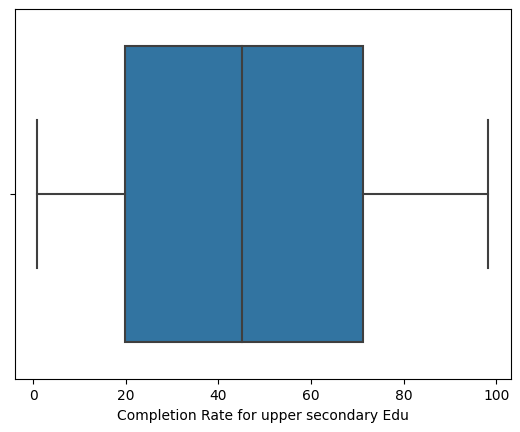

In [33]:
sns.boxplot(x=upper['Completion Rate for upper secondary Edu'])

From the boxplot, it can be deduced that there is no outlier in the dataset since there is no indication of any point beyond the T-shaped whiskers



**Question 2**

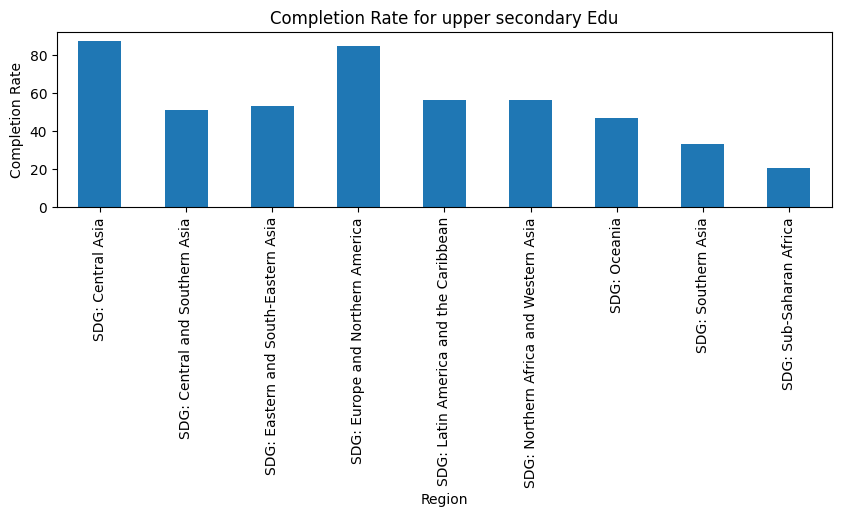

In [34]:
grouped_by_region = upper.groupby(['Region'])['Completion Rate for upper secondary Edu'].mean()
grouped_by_country = upper.groupby(['Country'])['Completion Rate for upper secondary Edu'].mean()

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
grouped_by_region.plot(kind='bar')
plt.title('Completion Rate for upper secondary Edu')
plt.ylabel('Completion Rate')

#plt.subplot(2, 1, 2)
#grouped_by_country.plot(kind='bar')
#plt.title('Completion Rate for upper secondary Edu')
#plt.ylabel('Completion Rate')
#plt.xticks(rotation=90)

plt.show()

In [35]:
#The Regions With the lowest and Highest Completion Rates
print(f"Region with the lowest completion rate is {grouped_by_region.idxmin()} ({grouped_by_region.min()})")
print(f"Region with the highest completion rate is {grouped_by_region.idxmax()} ({grouped_by_region.max()})")

Region with the lowest completion rate is SDG: Sub-Saharan Africa (20.528714788732394)
Region with the highest completion rate is SDG: Central Asia (87.78571428571429)




**Question 3**
To get the top five countries with the highest completion rate and bottom 5 with the lowest completion rates

In [36]:
# Group by countries and calculate the average completion rate
average_completion_by_country = upper.groupby("Country")["Completion Rate for upper secondary Edu"].mean()

# Sort the grouped data in descending order and get the top five countries
Top_countries = average_completion_by_country.sort_values(ascending=False).head(5)
lowest_countries = average_completion_by_country.sort_values(ascending=False).tail(5)
#Top 5 countries with highest completion rate
print('Top 5 Countries with the highest completion Rate')
pd.DataFrame(Top_countries)

Top 5 Countries with the highest completion Rate


,Completion Rate for upper secondary Edu
Country,
Kazakhstan,96.928889
Uzbekistan,95.040000
Ukraine,94.891667
Jamaica,94.610000
Turkmenistan,94.582222


In [37]:
#Bottom 5 countries with lowest completion rate
print('Bottom 5 Countries with the lowest completion Rate')
pd.DataFrame(lowest_countries)

Bottom 5 Countries with the lowest completion Rate


,Completion Rate for upper secondary Edu
Country,
Burundi,7.495556
Chad,7.145000
Burkina Faso,6.204000
Mozambique,5.215000
Niger,3.384167


In [38]:
# Which countries show the lowest literacy rates for individuals aged 25-64?

# Group by countries and calculate the average completion rate
average_literacy_by_country = upper.groupby("Country")["Literacy rate for 25-64 years old"].mean()

# Sort the grouped data in ascending order and get the top and bottom five countries
Lowest_literacy = average_literacy_by_country.sort_values(ascending=True).head(5)

Highest_literacy = average_literacy_by_country.sort_values(ascending=True).tail(5)

print('Countries with Lowest Literacy Rate for 25 - 64 years old')
pd.DataFrame(Lowest_literacy)

Countries with Lowest Literacy Rate for 25 - 64 years old


,Literacy rate for 25-64 years old
Country,
Mali,55.220556
Pakistan,57.026111
Chad,57.956111
Guinea,60.430000
Burkina Faso,60.966000


In [39]:
# Which countries show the Highest literacy rates for individuals aged 25-64?
print('Countries with Highest Literacy Rate for 25 - 64 years old')
pd.DataFrame(Highest_literacy)

Countries with Highest Literacy Rate for 25 - 64 years old


,Literacy rate for 25-64 years old
Country,
Peru,94.1630
Paraguay,95.3255
Colombia,95.4015
Uruguay,95.8050
Uzbekistan,100.0000




**Question 4**

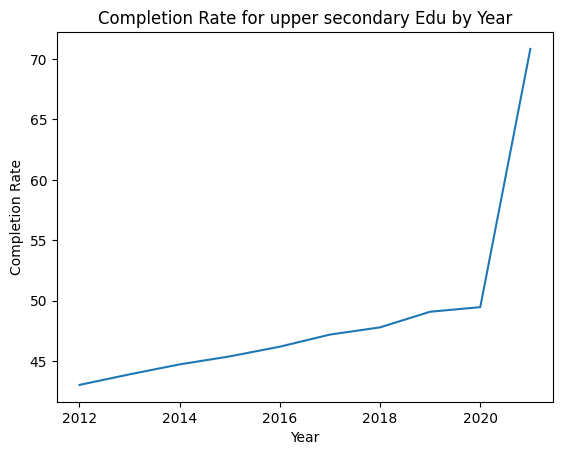

In [40]:
upper.groupby(['Year'])['Completion Rate for upper secondary Edu'].mean().plot(kind='line')
plt.title('Completion Rate for upper secondary Edu by Year')
plt.ylabel('Completion Rate')
plt.show()


The year with the lowest completion rate is 2012

The year with the highest completion rate is 2020


**Question 5**

In [41]:
upper.groupby(['Gender'])['Completion Rate for upper secondary Edu'].count()

Gender
female    938
male      938
Name: Completion Rate for upper secondary Edu, dtype: int64

This means the number of Females and Males who have completed school are the same



**Question 6**

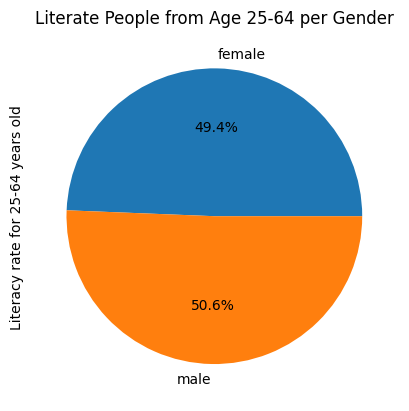

In [42]:
upper.groupby(['Gender'])['Literacy rate for 25-64 years old'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Literate People from Age 25-64 per Gender')
plt.show()

The literacy rate between ages 25-64 is higher in men(50.6%) than women(49.4%) by 1.2%.



**Question 7**

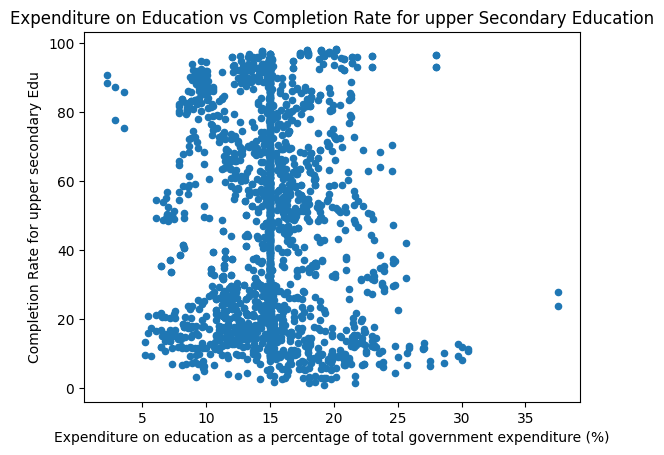

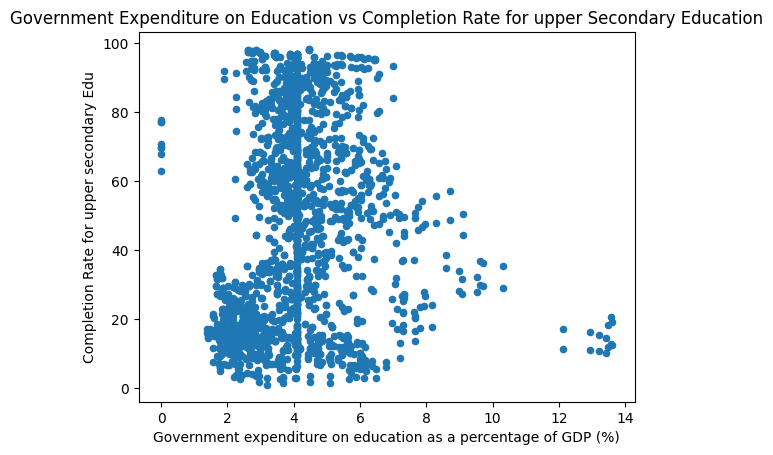

In [43]:
upper.plot(kind='scatter', x='Expenditure on education as a percentage of total government expenditure (%)', y='Completion Rate for upper secondary Edu')
plt.title('Expenditure on Education vs Completion Rate for upper Secondary Education')
plt.show()

upper.plot(kind='scatter', x='Government expenditure on education as a percentage of GDP (%)', y='Completion Rate for upper secondary Edu')
plt.title('Government Expenditure on Education vs Completion Rate for upper Secondary Education')
plt.show()

The scatter plots show that there is no strong correlation between the target variable(Completion rates) and Expenditure on education as a percentage of total government expenditure as well as Government expenditure on education as a percentage of GDP.



**Question 9**

<ipython-input-51-06238ce1e7c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(upper.corr(), annot=True)


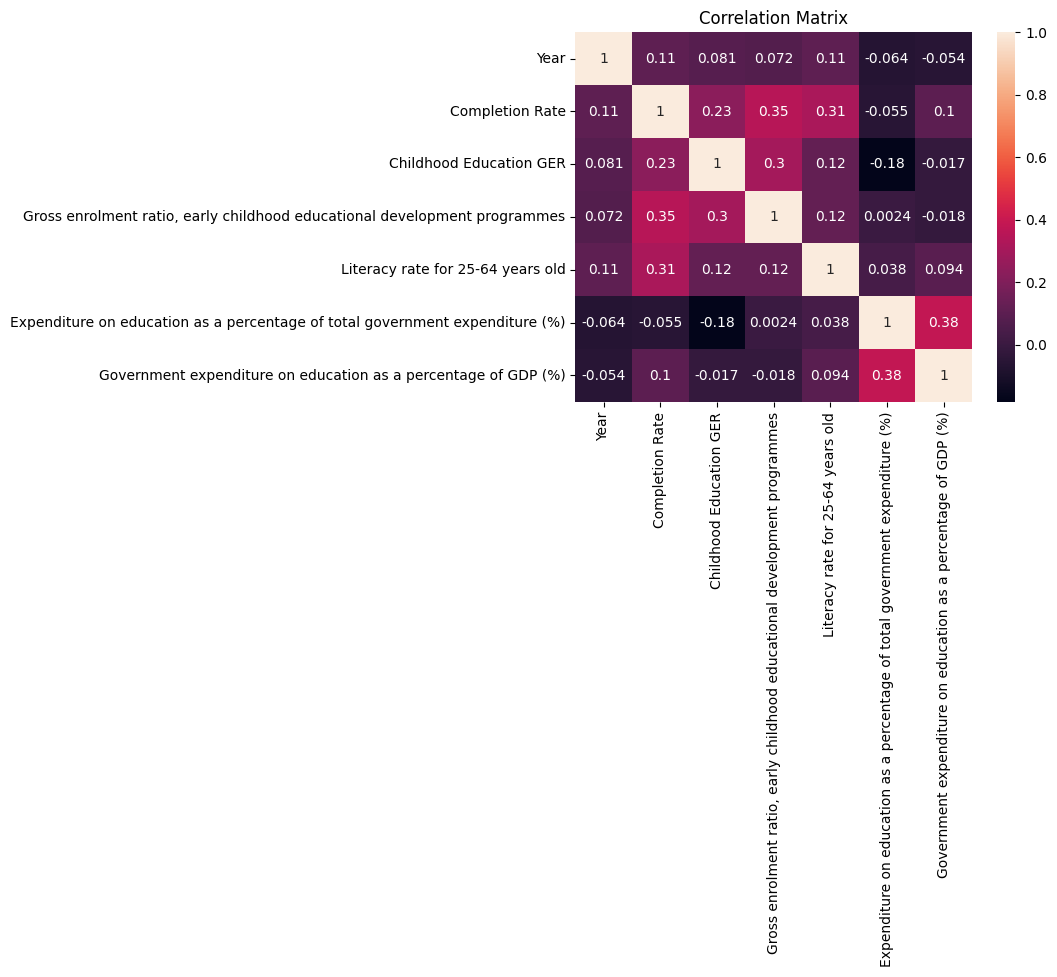

In [51]:
sns.heatmap(upper.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

The correlation plot shows that there is a correlation between the target variable and all the other variables except 'Expenditure on education as a percentage of total government expenditure'.



**Question 10**

In [48]:
# Combine dataframes and add a new column to indicate the source
primary.rename(columns={'Completion Rate for Primary Edu': 'Completion Rate'}, inplace=True)
lower.rename(columns={'Completion Rate for lower secondary Edu': 'Completion Rate'}, inplace=True)
upper.rename(columns={'Completion Rate for upper secondary Edu': 'Completion Rate'}, inplace=True)
upper.columns

Index(['Region', 'Country', 'Year', 'Gender', 'Completion Rate',
       'Childhood Education GER',
       'Gross enrolment ratio, early childhood educational development programmes',
       'Literacy rate for 25-64 years old',
       'Expenditure on education as a percentage of total government expenditure (%)',
       'Government expenditure on education as a percentage of GDP (%)'],
      dtype='object')

<ipython-input-49-c106d7c5c1b3>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Source', y='Completion Rate', data=melted_completion, ci=None)


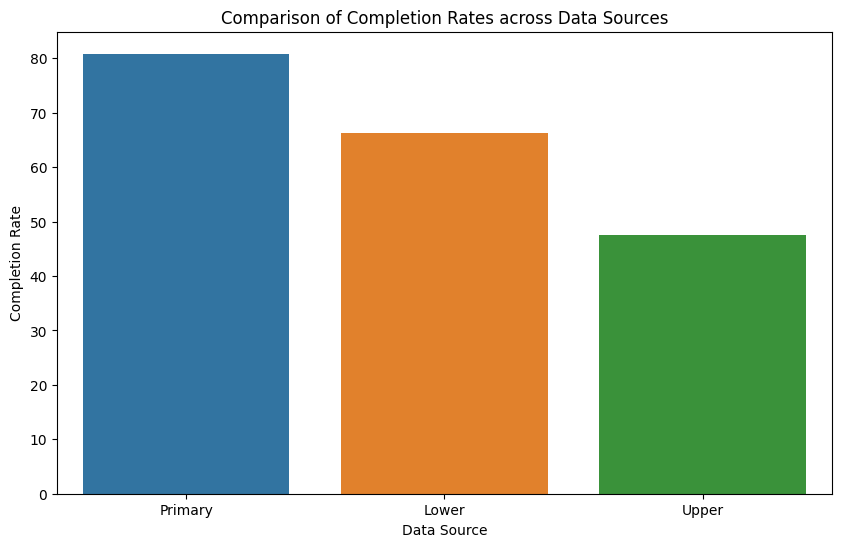

In [49]:
# Merge dataframes based on 'Region' and 'Country' columns and include only the 'Completion Rate' column
completion_across_levels = pd.merge(primary[['Region', 'Country', 'Completion Rate']],
                                   lower[['Region', 'Country', 'Completion Rate']],
                                   on=['Region', 'Country'],
                                   suffixes=('_Primary', '_Lower'))

# Merge 'upper' dataframe if it has the 'Completion Rate' column
if 'Completion Rate' in upper.columns:
    completion_across_levels = pd.merge(completion_across_levels[['Region', 'Country', 'Completion Rate_Primary', 'Completion Rate_Lower']],
                                       upper[['Region', 'Country', 'Completion Rate']],
                                       on=['Region', 'Country'],
                                       suffixes=('_Primary', '_Lower','_Upper'))

#Rename columns for clarity
completion_across_levels.rename(columns={'Completion Rate_Primary': 'Primary',
                                         'Completion Rate_Lower': 'Lower',
                                         'Completion Rate': 'Upper'}, inplace=True)

# Melt the dataframe for bar plot
melted_completion = completion_across_levels.melt(id_vars=['Region', 'Country'],
                                                   var_name='Source',
                                                   value_name='Completion Rate')

# Create a bar plot to compare completion rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Source', y='Completion Rate', data=melted_completion, ci=None)
plt.xlabel('Data Source')
plt.ylabel('Completion Rate')
plt.title('Comparison of Completion Rates across Data Sources')
plt.show()
